# Day2 彩色图片分类

### 1.设置GPU设备

In [29]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

#设置GPU设备
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### 2.数据预处理与加载

Files already downloaded and verified
Files already downloaded and verified


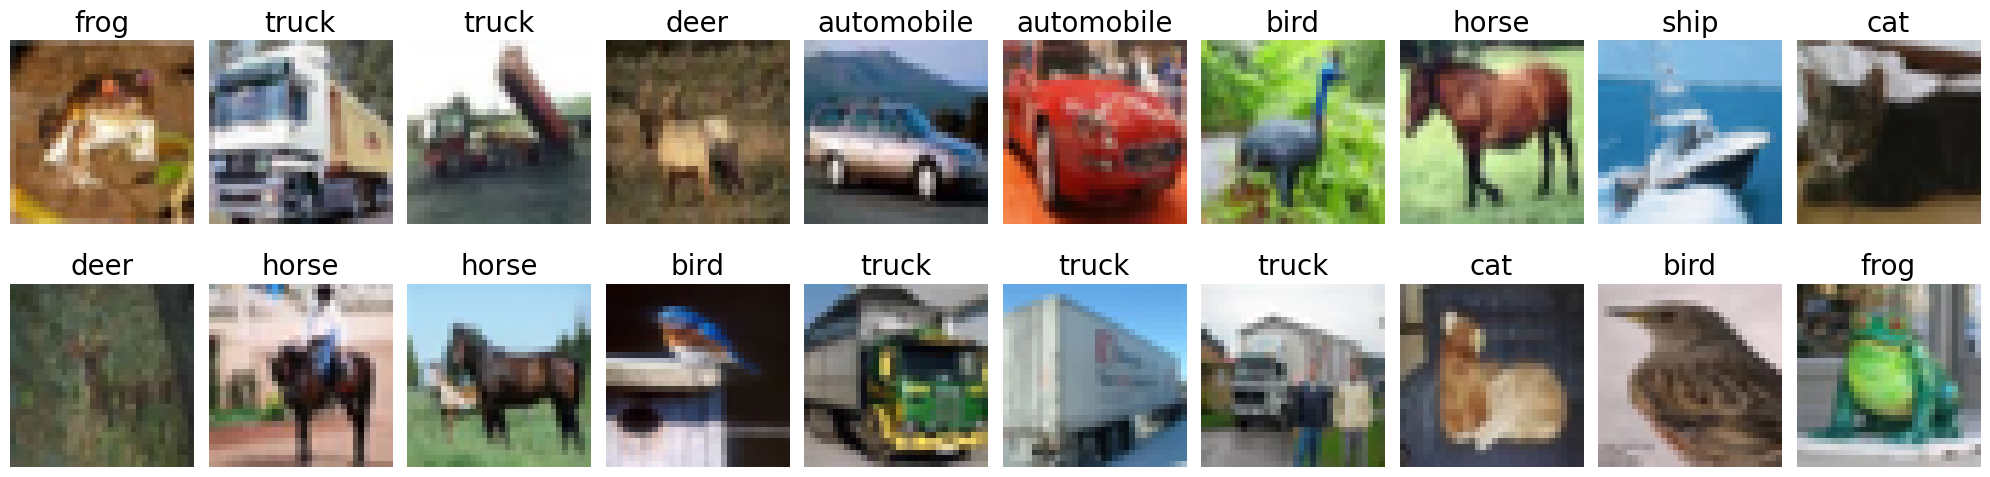

In [30]:
transform = transforms.Compose([transforms.ToTensor()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


#可视化训练图像
plt.figure(figsize=(20, 10))
for i in range(20):
    image, label = trainset[i]
    image = image.permute(1, 2, 0).numpy()
    
    plt.subplot(4, 10, i+1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(class_names[label], fontsize =20)
       
plt.tight_layout()
plt.show()


### 3.构建CNN 模型

In [31]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(3, 32, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(32, 64, 3),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 64, 3),
            nn.ReLU(),
        )
        
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1024, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )
        
    def forward(self, x):
        x = self.conv(x)
        x = self.fc(x)
        return x

model = SimpleCNN().to(device)

### 4. 损失函数和优化器

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

### 5.训练模型以及模型验证

In [33]:
num_epochs = 10
train_acc_list = []
val_acc_list = []

for epoch in range(num_epochs):
    model.train()
    correct = 0
    total = 0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    acc = correct /total
    train_acc_list.append(acc)
    print(f"Epoch [{epoch+1} / {num_epochs}], Accuracy: {acc: .4f}") 
    
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, lables = images.to(device), labels.to(device)
            outputs = model(images)
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    val_acc = correct / total
    val_acc_list.append(val_acc)
    print(f"Validation Accuracy: {val_acc: .4f}")        

Epoch [1 / 10], Accuracy:  0.3728
Validation Accuracy:  0.4900
Epoch [2 / 10], Accuracy:  0.5118
Validation Accuracy:  0.5593
Epoch [3 / 10], Accuracy:  0.5723
Validation Accuracy:  0.5847
Epoch [4 / 10], Accuracy:  0.6088
Validation Accuracy:  0.6151
Epoch [5 / 10], Accuracy:  0.6372
Validation Accuracy:  0.6405
Epoch [6 / 10], Accuracy:  0.6612
Validation Accuracy:  0.6592
Epoch [7 / 10], Accuracy:  0.6798
Validation Accuracy:  0.6648
Epoch [8 / 10], Accuracy:  0.6931
Validation Accuracy:  0.6671
Epoch [9 / 10], Accuracy:  0.7056
Validation Accuracy:  0.6789
Epoch [10 / 10], Accuracy:  0.7186
Validation Accuracy:  0.6920


### 6.可视化模型训练以及验证的准确率

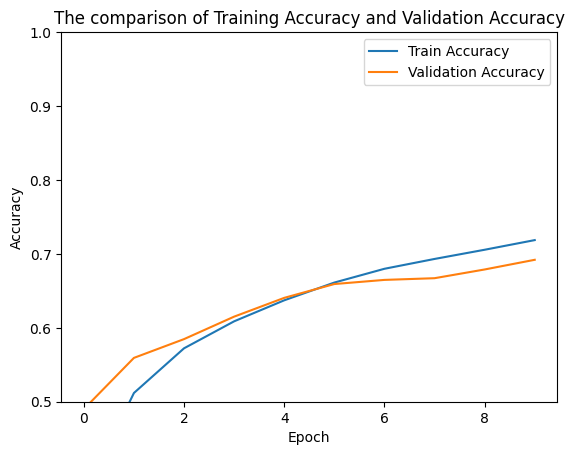

In [34]:
plt.plot(train_acc_list, label='Train Accuracy')
plt.plot(val_acc_list, label='Validation Accuracy')
plt.plot
plt.title('The comparison of Training Accuracy and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend()
plt.show()

### 7.预测样例

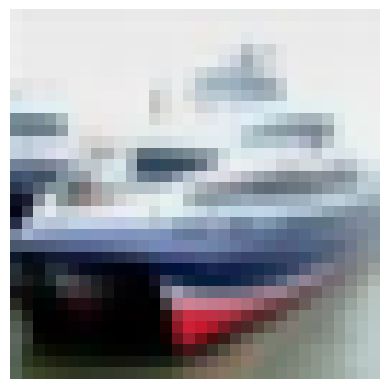

预测结果： ship


In [35]:
test_image, test_label = testset[1]

#显示图像
plt.imshow(test_image.permute(1, 2, 0))
plt.axis('off')
plt.show()

#预测样例
model.eval()
with torch.no_grad():
    output = model(test_image.unsqueeze(0))
    pred = torch.argmax(output, dim=1).item()
    
print("预测结果：", class_names[pred])